In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
url='https://services.swpc.noaa.gov/text/daily-geomagnetic-indices.txt'

In [3]:
r = requests.get(url)
data=r.text.splitlines()
data

[':Product: Daily Geomagnetic Data          DGD.txt',
 ':Issued: 0030 UT 29 Aug 2020',
 '#',
 '#  Prepared by the U.S. Dept. of Commerce, NOAA, Space Weather Prediction Center',
 '#  Please send comment and suggestions to SWPC.Webmaster@noaa.gov',
 '#',
 '#               Last 30 Days Daily Geomagnetic Data',
 '#',
 '#',
 '#                Middle Latitude        High Latitude            Estimated',
 '#              - Fredericksburg -     ---- College ----      --- Planetary ---',
 '#  Date        A     K-indices        A     K-indices        A     K-indices',
 '2020 07 31     5  2 1 0 1 3 1 1 2     5  0 1 0 2 4 1 0 1     4  1 1 1 1 2 1 1 1',
 '2020 08 01     3  0 0 0 1 2 1 2 1     1  0 1 1 0 1 0 0 0     3  0 1 0 1 1 1 1 1',
 '2020 08 02     9  0 1 2 3 3 2 2 3    21  0 1 1 5 5 5 2 2     9  1 1 1 3 3 3 2 3',
 '2020 08 03    15  3 3 3 3 3 3 3 3    26  3 4 4 6 3 4 2 2    16  4 3 3 3 2 3 3 3',
 '2020 08 04     9  2 4 2 1 2 2 2 2    13  3 4 2 4 3 1 1 1     8  2 4 2 2 2 1 2 2',
 '2020 08 05   

In [4]:
class event:
    def __init__(self,line):
        self.date=line[0:10]
        self.middle=np.array(list(map(int,line[17:33].split())))
        self.high=np.array(list(map(int,line[40:56].split())))
        self.planetary=np.array(list(map(int,line[63:89].split())))
        

li=[]
# Creating list of event class objects
for line in data:
    # Ignore commented lines
    if line.startswith(":") == False and line.startswith("#") == False:
        # Ignore future dates
        if line[14:16] != '-1':
            d = event(line)
            li.append(d)

# For each latitude, merge recorded k-indexes
k_middle=np.concatenate([o.middle for o in li])
k_high=np.concatenate([o.high for o in li])
k_planetary=np.concatenate([o.planetary for o in li])

# Omit k-indices below 0 and above 4
k_middle = k_middle[(k_middle >= 0) & (k_middle <=4)]
k_high = k_high[(k_high >= 0) & (k_high <=4)]
k_planetary = k_planetary[(k_planetary >= 0) & (k_planetary <=4)]

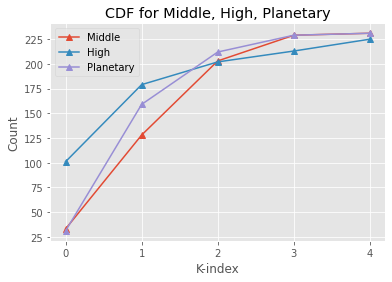

In [5]:
plt.style.use('ggplot')

middle_values, middle_base = np.histogram(k_middle,range(k_middle.min(),k_middle.max()+2))
middle_cumulative = np.cumsum(middle_values)

high_values, high_base = np.histogram(k_high,range(k_high.min(),k_high.max()+2))
high_cumulative = np.cumsum(high_values)

planetary_values, planetary_base = np.histogram(k_planetary,range(k_planetary.min(),k_planetary.max()+2))
planetary_cumulative = np.cumsum(planetary_values)

fig, ax = plt.subplots()
ax.set(xlabel='K-index',ylabel='Count',title='CDF for Middle, High, Planetary')
ax.plot(middle_base[:-1], middle_cumulative, '-^',label='Middle')
ax.plot(high_base[:-1], high_cumulative, '-^',label='High')
ax.plot(planetary_base[:-1], planetary_cumulative, '-^',label='Planetary')
plt.xticks(np.arange(0,5))
ax.legend()

In [38]:
print('Middle')
print('=========')
for item,kindex in zip(middle_values,range(0,5)):
    print('Total hours spent at K-index of',kindex,':',item*3)
print('\n')
    
print('High')
print('=========')
for item,kindex in zip(high_values,range(0,5)):
    print('Total hours spent at K-index of',kindex,':',item*3)
print('\n')

print('Planetary')
print('=========')
for item,kindex in zip(planetary_values,range(0,5)):
    print('Total hours spent at K-index of',kindex,':',item*3)

Middle
Total hours spent at K-index of 0 : 99
Total hours spent at K-index of 1 : 285
Total hours spent at K-index of 2 : 225
Total hours spent at K-index of 3 : 78
Total hours spent at K-index of 4 : 6


High
Total hours spent at K-index of 0 : 303
Total hours spent at K-index of 1 : 234
Total hours spent at K-index of 2 : 69
Total hours spent at K-index of 3 : 33
Total hours spent at K-index of 4 : 36


Planetary
Total hours spent at K-index of 0 : 93
Total hours spent at K-index of 1 : 384
Total hours spent at K-index of 2 : 159
Total hours spent at K-index of 3 : 51
Total hours spent at K-index of 4 : 6
